In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import random

In [2]:
cricketers = pd.read_csv('cricketers.csv')
cricketers.head()

,PLAYER,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
0,Aaron Finch,10,9,134,46,100,16.75,144.00,0,0.0,0,0,0.0,0.0
1,AB de Villiers,12,11,480,90,275,53.33,174.54,0,0.0,0,0,0.0,0.0
2,Abhishek Sharma,3,3,63,46,33,63.00,190.90,0,0.0,0,0,0.0,0.0
3,Ajinkya Rahane,15,14,370,65,313,28.46,118.21,0,0.0,0,0,0.0,0.0
4,Alex Hales,6,6,148,45,118,24.66,125.42,0,0.0,0,0,0.0,0.0


In [3]:
cricketers = cricketers.drop(["PLAYER"],axis=1)

In [4]:
cricketers.head()

,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
0,10,9,134,46,100,16.75,144.00,0,0.0,0,0,0.0,0.0
1,12,11,480,90,275,53.33,174.54,0,0.0,0,0,0.0,0.0
2,3,3,63,46,33,63.00,190.90,0,0.0,0,0,0.0,0.0
3,15,14,370,65,313,28.46,118.21,0,0.0,0,0,0.0,0.0
4,6,6,148,45,118,24.66,125.42,0,0.0,0,0,0.0,0.0


In [5]:
minmaxscaler = preprocessing.MinMaxScaler()
names = cricketers.columns
arr = minmaxscaler.fit_transform(cricketers)
df = pd.DataFrame(arr, columns=names)
df.head()

,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
0,0.588235,0.529412,0.182313,0.359375,0.193798,0.220889,0.480000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.705882,0.647059,0.653061,0.703125,0.532946,0.703284,0.581800,0.0,0.0,0.0,0.0,0.0,0.0
2,0.176471,0.176471,0.085714,0.359375,0.063953,0.830806,0.636333,0.0,0.0,0.0,0.0,0.0,0.0
3,0.882353,0.823529,0.503401,0.507812,0.606589,0.375313,0.394033,0.0,0.0,0.0,0.0,0.0,0.0
4,0.352941,0.352941,0.201361,0.351562,0.228682,0.325201,0.418067,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.shape

(109, 13)

In [7]:
plt.rcParams['figure.figsize'] = (20,8)

C:\Users\Anush\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='average_runs', ylabel='bowling_economy'>

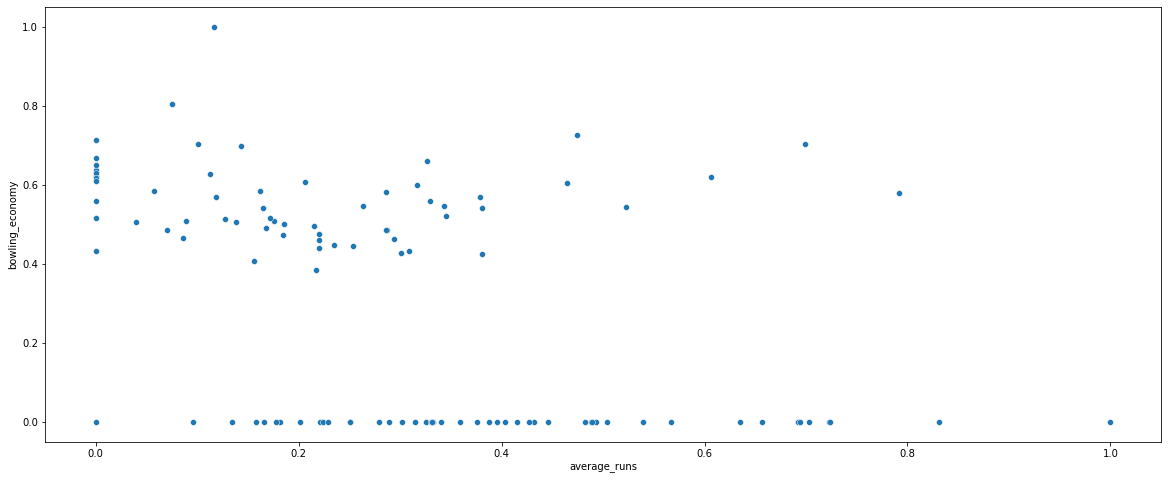

In [8]:
sns.scatterplot(df["average_runs"], df["bowling_economy"])

In [9]:
data = pd.DataFrame([df['average_runs'], df['bowling_economy']]).transpose()

In [10]:
data.shape

(109, 2)

In [11]:
def kmeans(K, num_iter):
    for i in range(num_iter):
        
        X = data.values
        m=X.shape[0]
        n=X.shape[1] 
        
        centroids=np.array([]).reshape(n,0) 
        
        for k in range(K):
            centroids=np.c_[centroids,X[random.randint(0,m-1)]]

        distance = np.array([]).reshape(m,0)

        for k in range(K):
            distance_value = np.sum((X-centroids[:,k])**2,axis=1)
            distance =np.c_[distance,distance_value]

        minimum_value = np.argmin(distance,axis=1)+1

        centroid_values ={}
        for k in range(K):
            centroid_values[k+1]=np.array([]).reshape(2,0)

        for k in range(m):
            centroid_values[minimum_value[k]]=np.c_[centroid_values[minimum_value[k]],X[k]]
        for k in range(K):
            centroid_values[k+1]=centroid_values[k+1].T

        for k in range(K):
             centroids[:,k]=np.mean(centroid_values[k+1],axis=0)
            
    final = centroid_values

    for k in range(K):
        plt.scatter(final[k+1][:,0],final[k+1][:,1])
    plt.scatter(centroids[0,:],centroids[1,:],s=300,c='black', cmap = 'RdBu')
    plt.xlabel("average_runs")
    plt.ylabel("bowling_economy")
    plt.show()

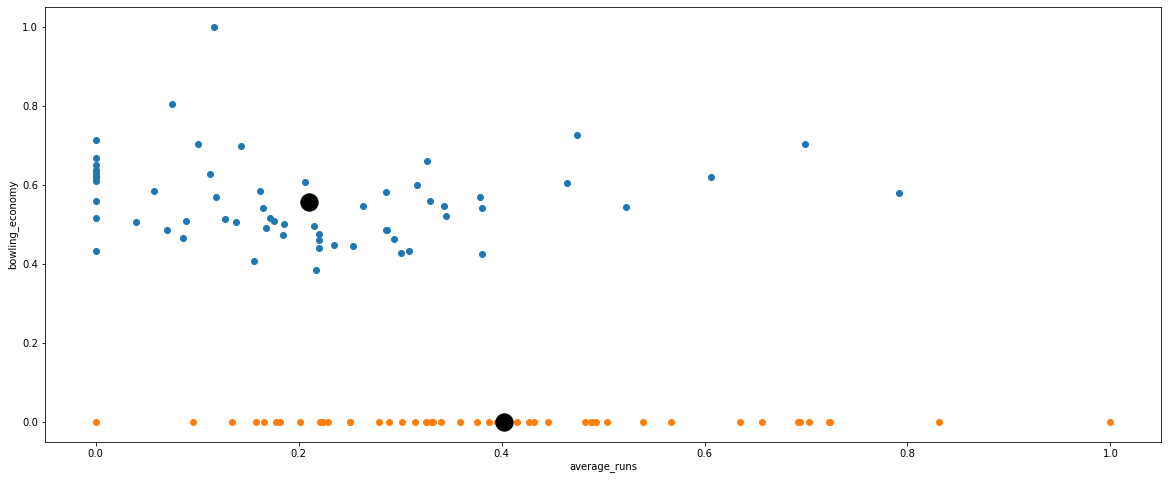

In [12]:
kmeans(2,20)

C:\Users\Anush\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Anush\anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


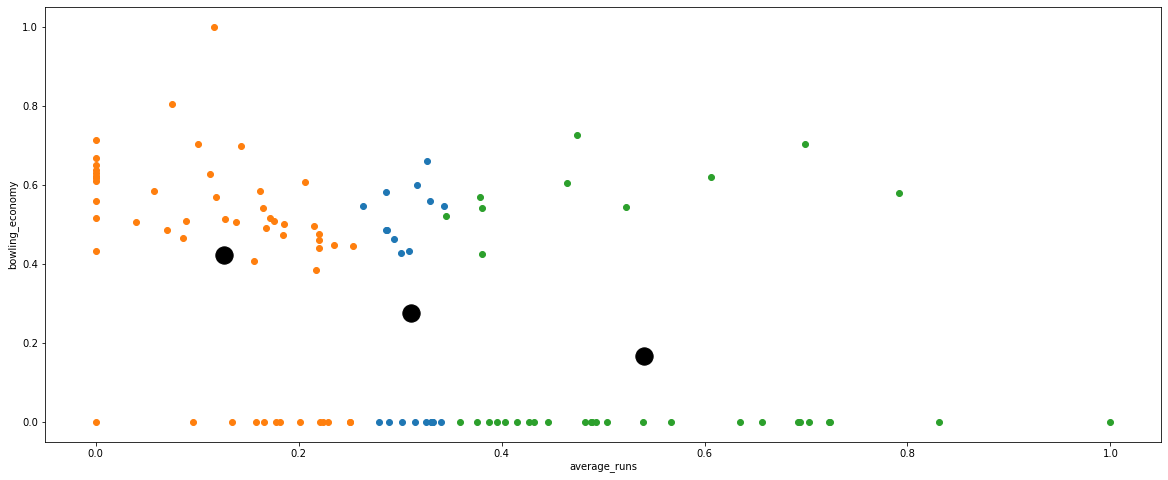

In [13]:
kmeans(3,20)

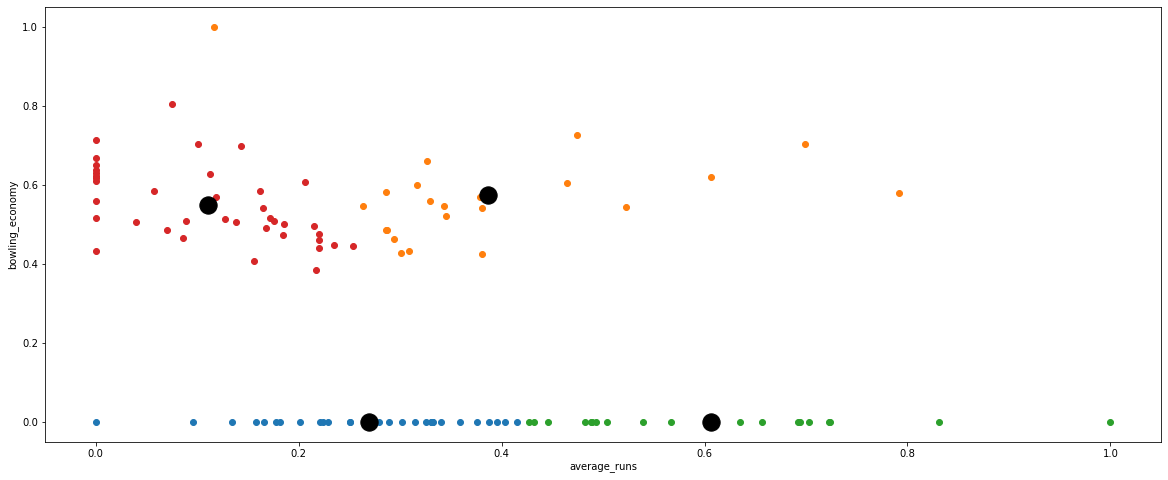

In [14]:
kmeans(4,20)

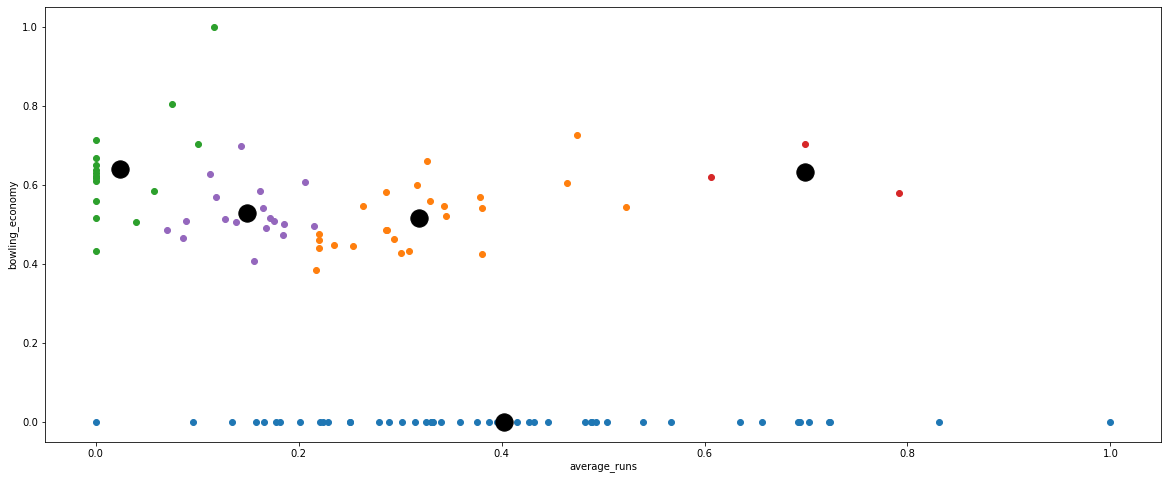

In [15]:
kmeans(5,20)